In [12]:
import pandas as pd
from dags.LoadFeatures import *
from dags.training import LMS
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from math import sqrt
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
raw_data = datasets.load_boston()
serving_data = pd.DataFrame(data=raw_data.data,columns=raw_data.feature_names)

In [3]:
serving_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
serving_data_Y = raw_data['target']
serving_data_X = serving_data

In [5]:
serving_data_X_train, serving_data_X_test, serving_data_Y_train, serving_data_Y_test = train_test_split(serving_data_X, serving_data_Y, test_size=0.2, random_state=42)

In [6]:
trainer = LMS.LMSTrainer(analytic=True)
trainer.fit(X = serving_data_X_train, y = serving_data_Y_train)

LMSTrainer(analytic=True)

In [7]:
predictions = trainer.predict(serving_data_X_test)

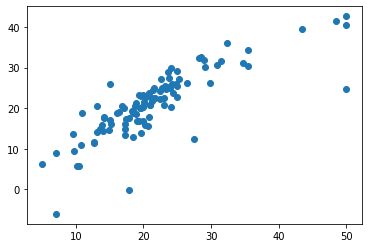

In [8]:
plt.scatter(serving_data_Y_test, predictions)
plt.show()

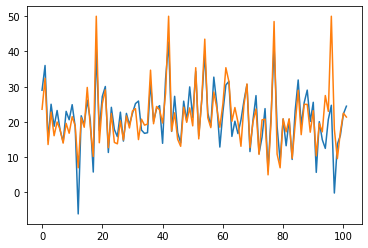

In [9]:
plt.plot(predictions)
plt.plot(serving_data_Y_test)
plt.show()

In [13]:
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((predictions - serving_data_Y_test)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(serving_data_Y_test, predictions))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(serving_data_Y_test, predictions))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % sqrt(mean_squared_error(serving_data_Y_test, predictions)))
print("R2-score: %.2f" % r2_score(predictions, serving_data_Y_test))

Soma dos Erros ao Quadrado (SSE): 2478 
Erro Quadrático Médio (MSE): 24.29
Erro Médio Absoluto (MAE): 3.19
Raiz do Erro Quadrático Médio (RMSE): 4.93 
R2-score: 0.63
